In [31]:
from aoq_automation.database.utils import parse_time_as_seconds
from aoq_automation.webparse.source_finding.youtube import *
from youtubesearchpython import VideosSearch
from rapidfuzz import fuzz, distance
import matplotlib.pyplot as plt
import numpy as np
from typing import *

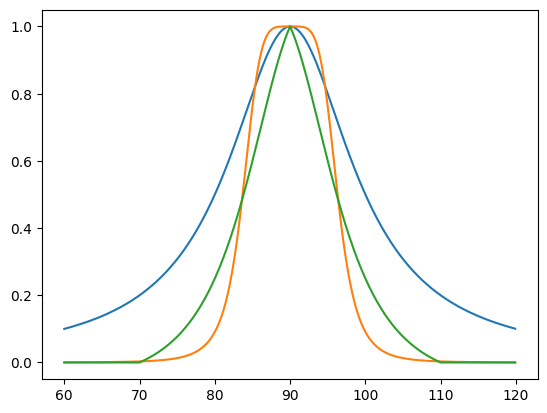

In [32]:
xs = np.arange(60, 120, 0.1)
plt.plot(xs, np.array([similarity(x, 90, sigma=-2, p=2, k=0) for x in xs]))
plt.plot(xs, np.array([similarity(x, 90, sigma=-4, p=5, k=0) for x in xs]))
plt.plot(xs, np.array([similarity(x, 90, sigma=-2, p=2, k=0.05) for x in xs]))

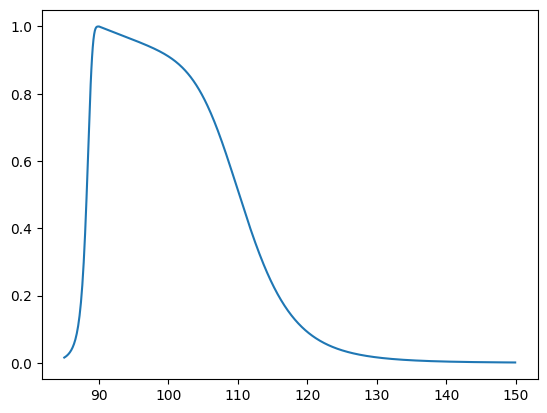

In [33]:
xs = np.arange(85, 150, 0.1)
plt.plot(xs, np.array([assymetrical_similarity(x, 90) for x in xs]))

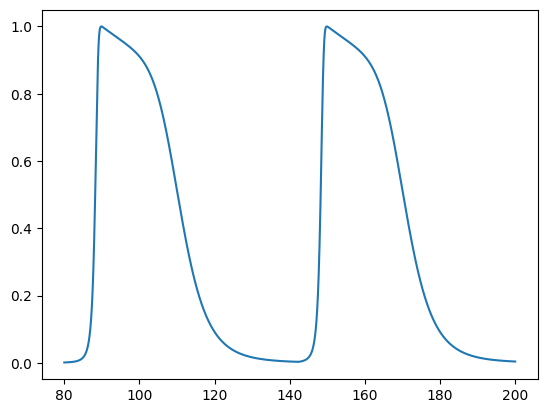

In [34]:
xs = np.arange(80, 200, 0.02)
plt.plot(xs, np.array([max(assymetrical_similarity(x, 90), assymetrical_similarity(x, 150)) for x in xs]))

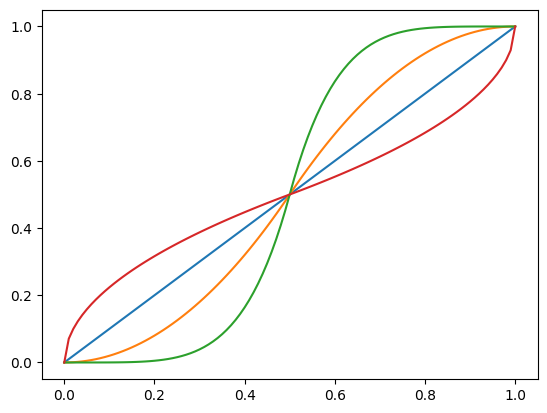

In [35]:
xs = np.arange(0, 1.01, 0.01)
plt.plot(xs, xs)
plt.plot(xs, np.array([contrast(x, 2) for x in xs]))
plt.plot(xs, np.array([contrast(x, 5) for x in xs]))
plt.plot(xs, np.array([contrast(x, .5) for x in xs]))

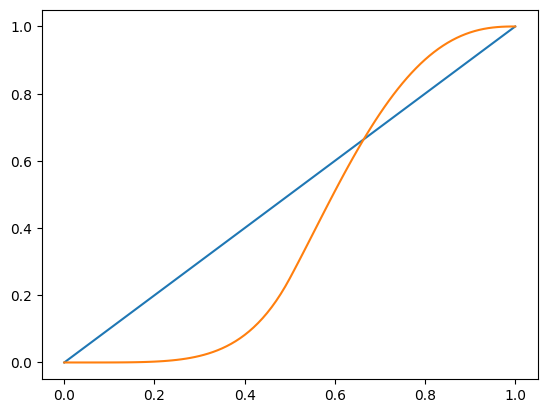

In [36]:
xs = np.arange(0, 1.01, 0.01)
plt.plot(xs, xs)
plt.plot(xs, np.array([contrast(x, 2.5)**2 for x in xs]))

In [37]:
# query = "Monogatari Series: Second Season Opening 5"
# results = [video["title"] for video in VideosSearch(query=query, limit=30).result()["result"]]
# results

In [38]:
preprocess("Nisekoi: False Love Season 2 Opening 1")

'nisekoi: false love s2 op1'

In [39]:
preprocess("Nisekoi: False Love Season 2 Opening")

'nisekoi: false love s2 op1'

In [40]:
preprocess("Nisekoi: False Love Season 2 Opening 1", num_w=3)

'nisekoi: false love s222 op111'

In [41]:
preprocess("Bungou Stray Dogs 5th Season OP1")

'bungou stray dogs s5 op1'

In [42]:
preprocess("Fate/Zero 2nd Season - OP")

'fate/zero s2 - op1'

In [43]:
def fullname(o: object) -> str:
    return ".".join([o.__module__, o.__name__])

def visualize_title_score(titles: List[str], query: str) -> None:
    p_query = preprocess(query, num_w=3)
    p_titles = [preprocess(title, num_w=3) for title in titles]
    indexes = np.arange(len(titles))
    fig, axs = plt.subplots(3)
    fig.set_figwidth(12)
    fig.set_figheight(24)
    plt.setp(axs, yticks=indexes, yticklabels=titles, title=query)
    for ax in axs:
        ax.invert_xaxis()
        ax.invert_yaxis()
        
    A1 = [fuzz.ratio, fuzz.token_set_ratio, fuzz.token_sort_ratio, fuzz.token_ratio]
    A2 = [fuzz.partial_ratio, fuzz.partial_token_set_ratio, fuzz.partial_token_sort_ratio, fuzz.partial_token_ratio]
    A3 = [
        distance.Hamming.normalized_similarity, 
        distance.Indel.normalized_similarity, 
        distance.Levenshtein.normalized_similarity, 
        distance.DamerauLevenshtein.normalized_similarity, 
        distance.Jaro.normalized_similarity, 
        distance.JaroWinkler.normalized_similarity
    ]
    
    for i, A in enumerate([A1, A2, A3]):
        for algorithm in A:
            axs[i].plot([algorithm(p_query, p_titles[i]) for i in indexes], indexes, label=fullname(algorithm))
    
    for ax in axs:
        ax.legend()
    plt.show()

c:\Users\mozha\AppData\Local\pypoetry\Cache\virtualenvs\aoq-automation-QhncwGBw-py3.13\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12418 (\N{HIRAGANA LETTER MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mozha\AppData\Local\pypoetry\Cache\virtualenvs\aoq-automation-QhncwGBw-py3.13\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12358 (\N{HIRAGANA LETTER U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mozha\AppData\Local\pypoetry\Cache\virtualenvs\aoq-automation-QhncwGBw-py3.13\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12381 (\N{HIRAGANA LETTER SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mozha\AppData\Local\pypoetry\Cache\virtualenvs\aoq-automation-QhncwGBw-py3.13\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12360 (\N{HIRAGANA LETTER E}) missing from font(s) DejaV

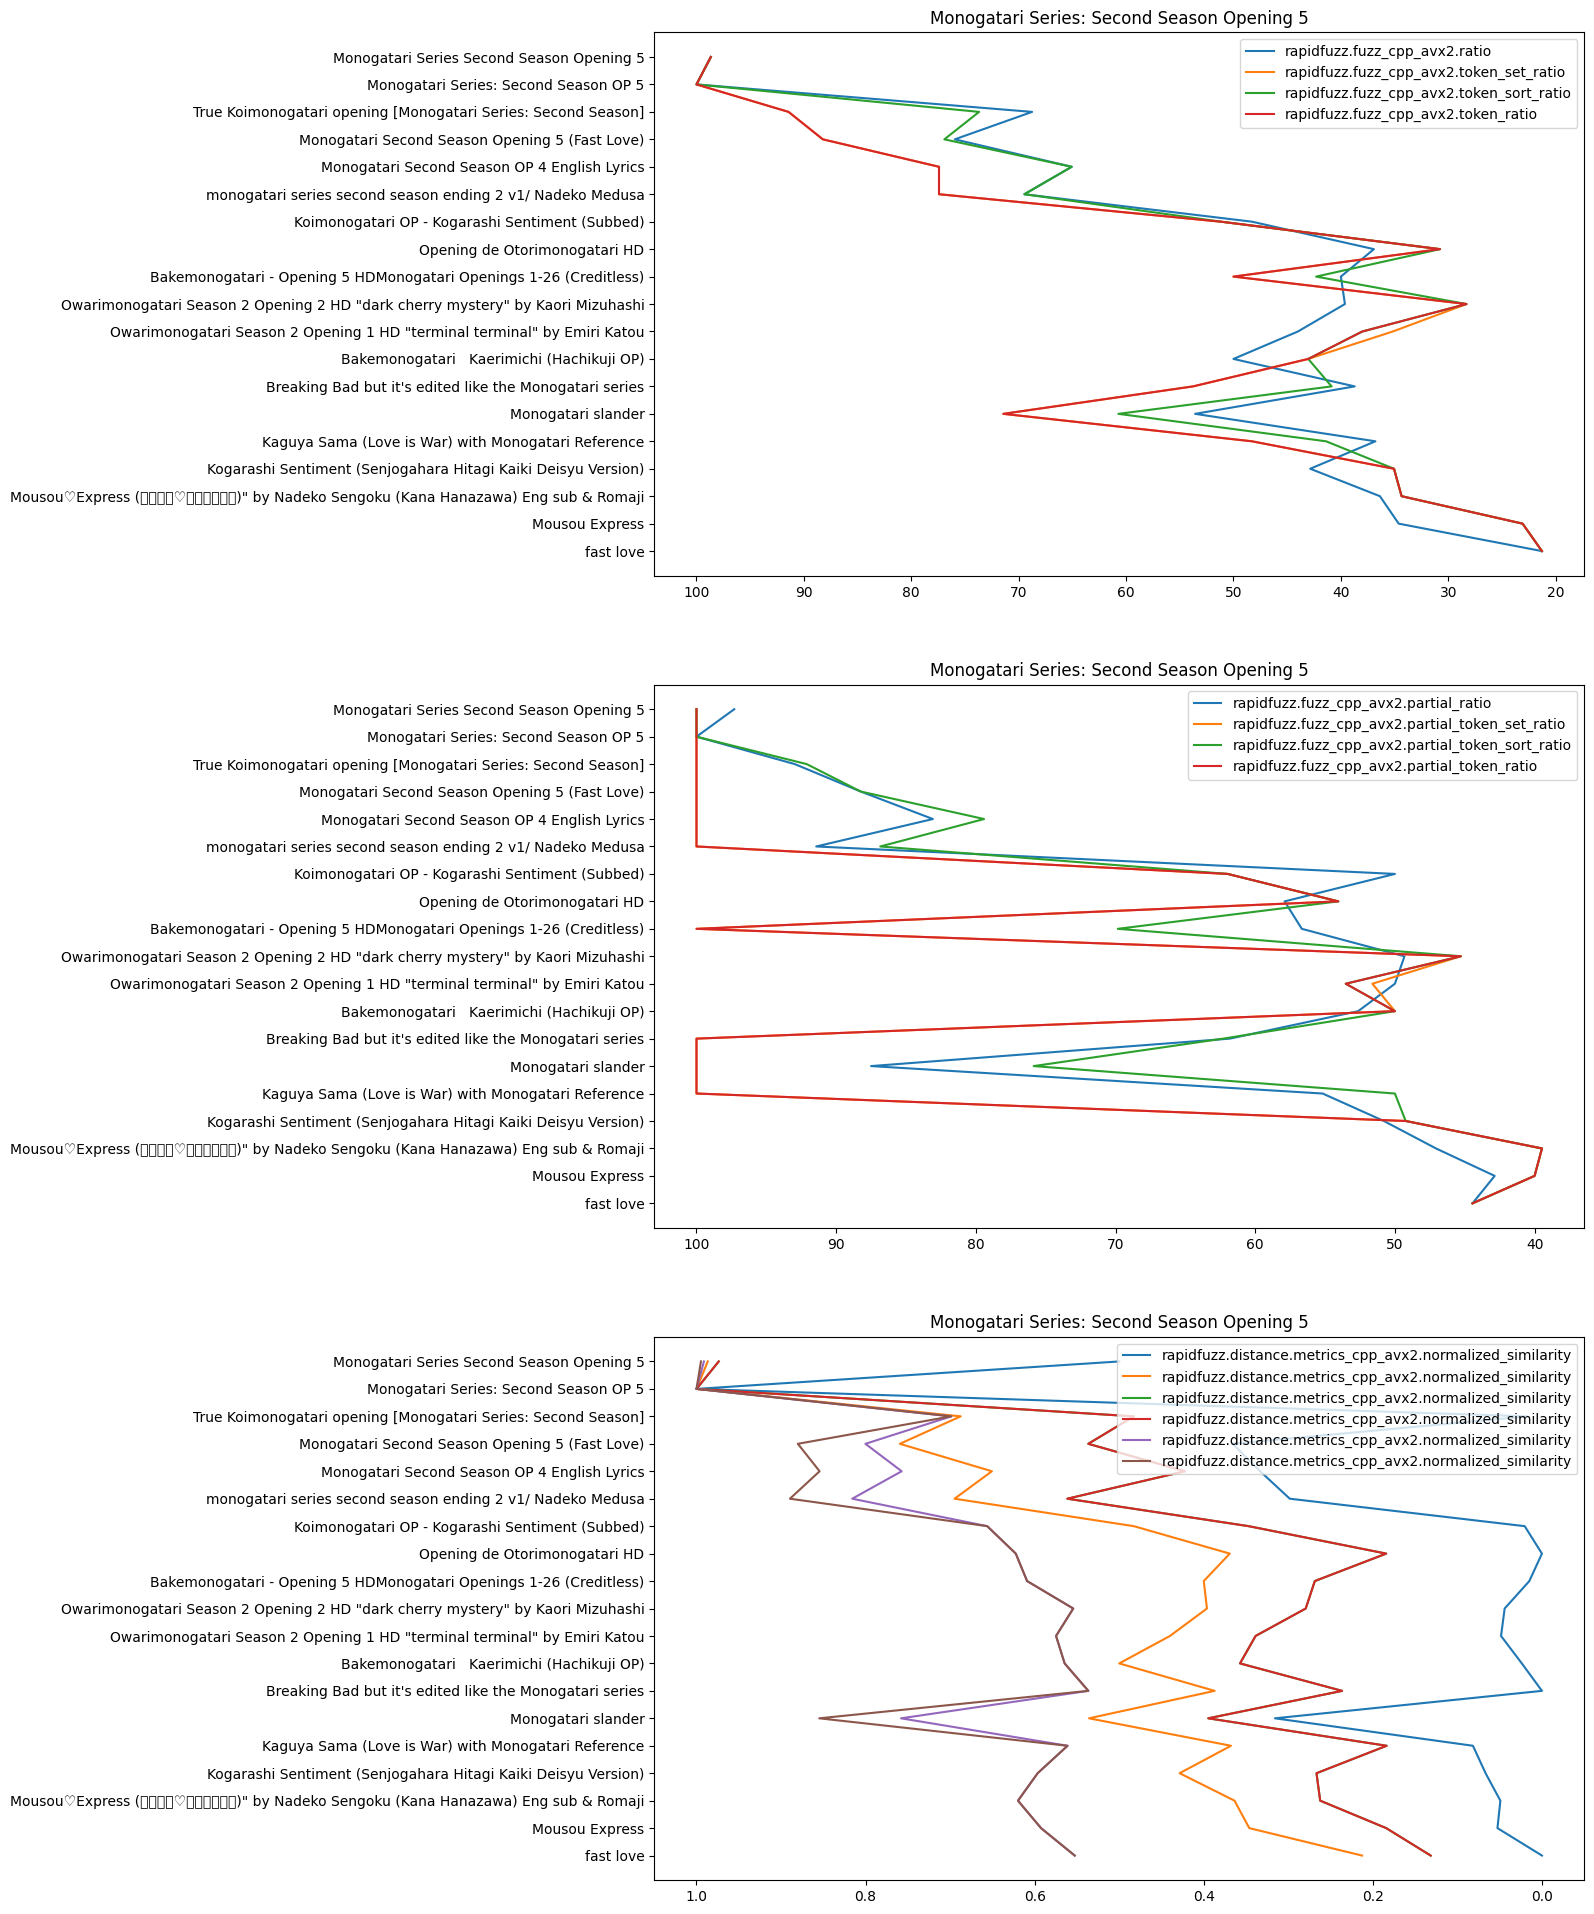

In [44]:
query = "Monogatari Series: Second Season Opening 5"

titles = [
    'Monogatari Series Second Season Opening 5',
    'Monogatari Series: Second Season OP 5',
    'True Koimonogatari opening [Monogatari Series: Second Season]',
    'Monogatari Second Season Opening 5 (Fast Love)',
    'Monogatari Second Season OP 4 English Lyrics',
    'monogatari series second season ending 2 v1/ Nadeko Medusa',
    'Koimonogatari OP - Kogarashi Sentiment (Subbed)',
    'Opening de Otorimonogatari HD',
    'Bakemonogatari - Opening 5 HD'
    'Monogatari Openings 1-26 (Creditless)',
    'Owarimonogatari Season 2 Opening 2 HD "dark cherry mystery" by Kaori Mizuhashi',
    'Owarimonogatari Season 2 Opening 1 HD "terminal terminal" by Emiri Katou',
    'Bakemonogatari   Kaerimichi (Hachikuji OP)',
    "Breaking Bad but it's edited like the Monogatari series",
    'Monogatari slander',
    'Kaguya Sama (Love is War) with Monogatari Reference',
    'Kogarashi Sentiment (Senjogahara Hitagi Kaiki Deisyu Version)',
    'Mousou♡Express (もうそう♡えくすぷれす)" by Nadeko Sengoku (Kana Hanazawa) Eng sub & Romaji',
    'Mousou Express',
    'fast love',
]

visualize_title_score(titles, query)

In [45]:
# query = "Nisekoi: False Love Season 2 Opening 1"
# results = [video["title"] for video in VideosSearch(query=query, limit=30).result()["result"]]
# results

c:\Users\mozha\AppData\Local\pypoetry\Cache\virtualenvs\aoq-automation-QhncwGBw-py3.13\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12304 (\N{LEFT BLACK LENTICULAR BRACKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mozha\AppData\Local\pypoetry\Cache\virtualenvs\aoq-automation-QhncwGBw-py3.13\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12305 (\N{RIGHT BLACK LENTICULAR BRACKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mozha\AppData\Local\pypoetry\Cache\virtualenvs\aoq-automation-QhncwGBw-py3.13\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12300 (\N{LEFT CORNER BRACKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mozha\AppData\Local\pypoetry\Cache\virtualenvs\aoq-automation-QhncwGBw-py3.13\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12301 (\N{RIGHT CORNER BRACKET}

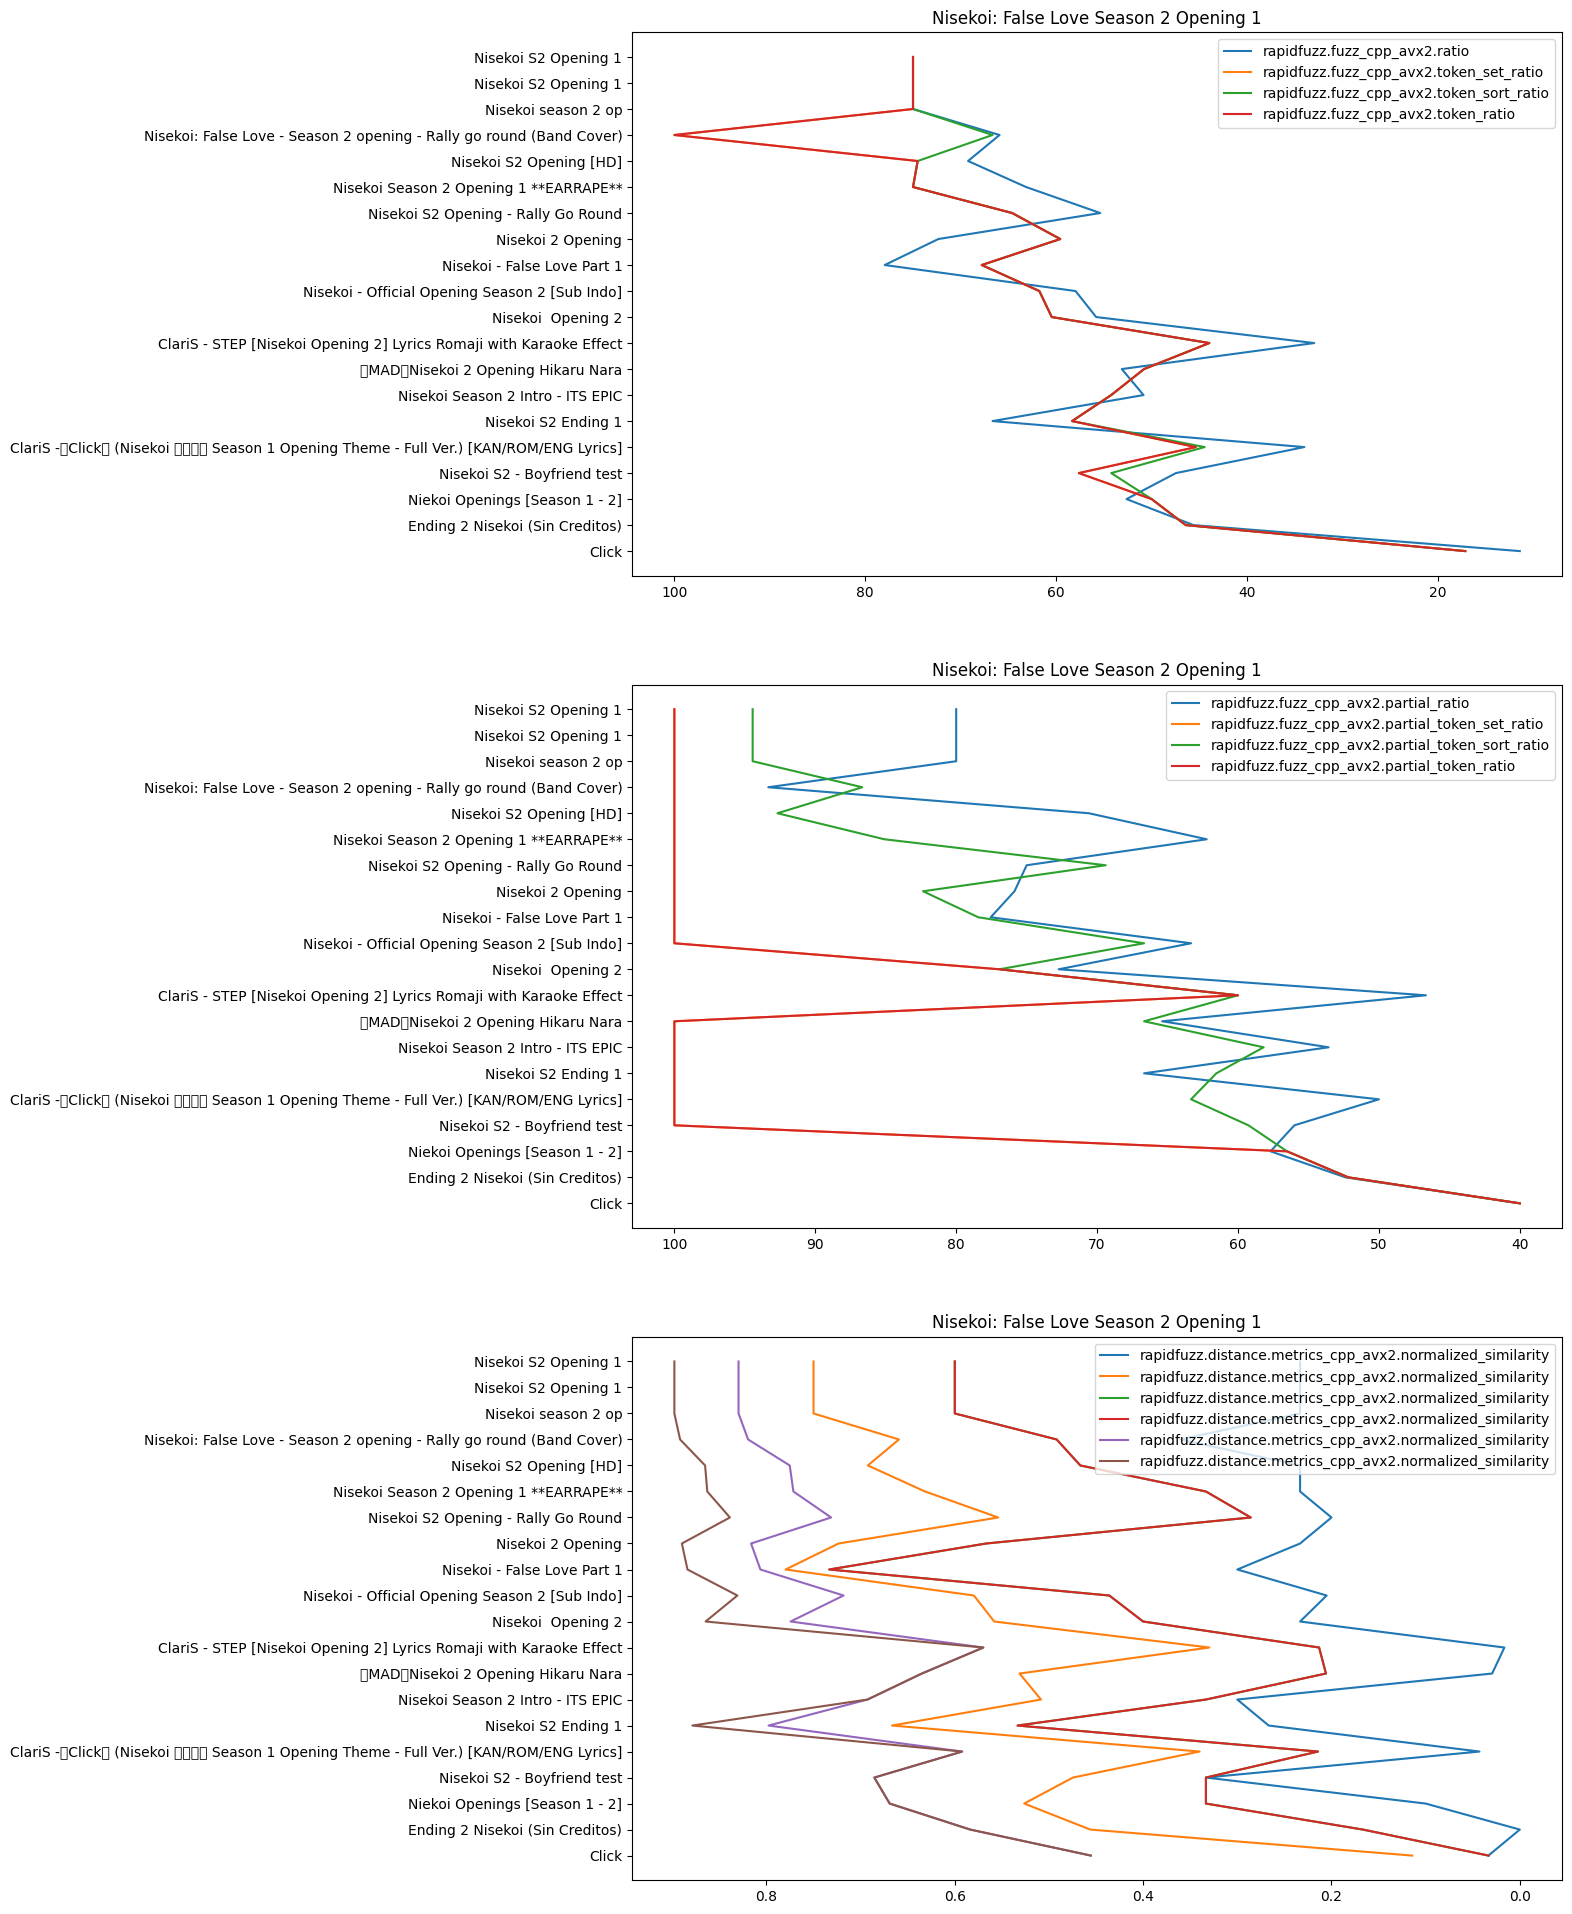

In [46]:
query = "Nisekoi: False Love Season 2 Opening 1"

titles = [
    'Nisekoi S2 Opening 1',
    'Nisekoi S2 Opening 1',
    'Nisekoi season 2 op',
    'Nisekoi: False Love - Season 2 opening - Rally go round (Band Cover)',
    'Nisekoi S2 Opening [HD]',
    'Nisekoi Season 2 Opening 1 **EARRAPE**',
    'Nisekoi S2 Opening - Rally Go Round',
    'Nisekoi 2 Opening',
    'Nisekoi - False Love Part 1',
    'Nisekoi - Official Opening Season 2 [Sub Indo]',
    'Nisekoi  Opening 2',
    'ClariS - STEP [Nisekoi Opening 2] Lyrics Romaji with Karaoke Effect',
    '【MAD】Nisekoi 2 Opening Hikaru Nara',
    'Nisekoi Season 2 Intro - ITS EPIC',
    'Nisekoi S2 Ending 1',
    'ClariS -「Click」 (Nisekoi ニセコイ Season 1 Opening Theme - Full Ver.) [KAN/ROM/ENG Lyrics]',
    'Nisekoi S2 - Boyfriend test',
    'Niekoi Openings [Season 1 - 2]',
    'Ending 2 Nisekoi (Sin Creditos)',
    'Click',
]

visualize_title_score(titles, query)

In [47]:
# in case we want to search for japanese too
jp_characters = u'\u3000-\u303f\u3040-\u309f\u30a0-\u30ff\uff00-\uff9f\u4e00-\u9faf\u3400-\u4dbf'
re.sub(f"[{jp_characters}]+", "TEST", "Nisekoi ニセコイ Season 1")

'Nisekoi TEST Season 1'

In [48]:
helpers = ["Creditless", "4K", "HD", "1080p"]
helpers_score(helpers, "Nisekoi S2 Opening 1")

0.0

In [49]:
helpers_score(helpers, "Nisekoi S2 Opening [HD]")

0.25

c:\Users\mozha\AppData\Local\pypoetry\Cache\virtualenvs\aoq-automation-QhncwGBw-py3.13\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12304 (\N{LEFT BLACK LENTICULAR BRACKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mozha\AppData\Local\pypoetry\Cache\virtualenvs\aoq-automation-QhncwGBw-py3.13\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12305 (\N{RIGHT BLACK LENTICULAR BRACKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mozha\AppData\Local\pypoetry\Cache\virtualenvs\aoq-automation-QhncwGBw-py3.13\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12300 (\N{LEFT CORNER BRACKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mozha\AppData\Local\pypoetry\Cache\virtualenvs\aoq-automation-QhncwGBw-py3.13\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12301 (\N{RIGHT CORNER BRACKET}

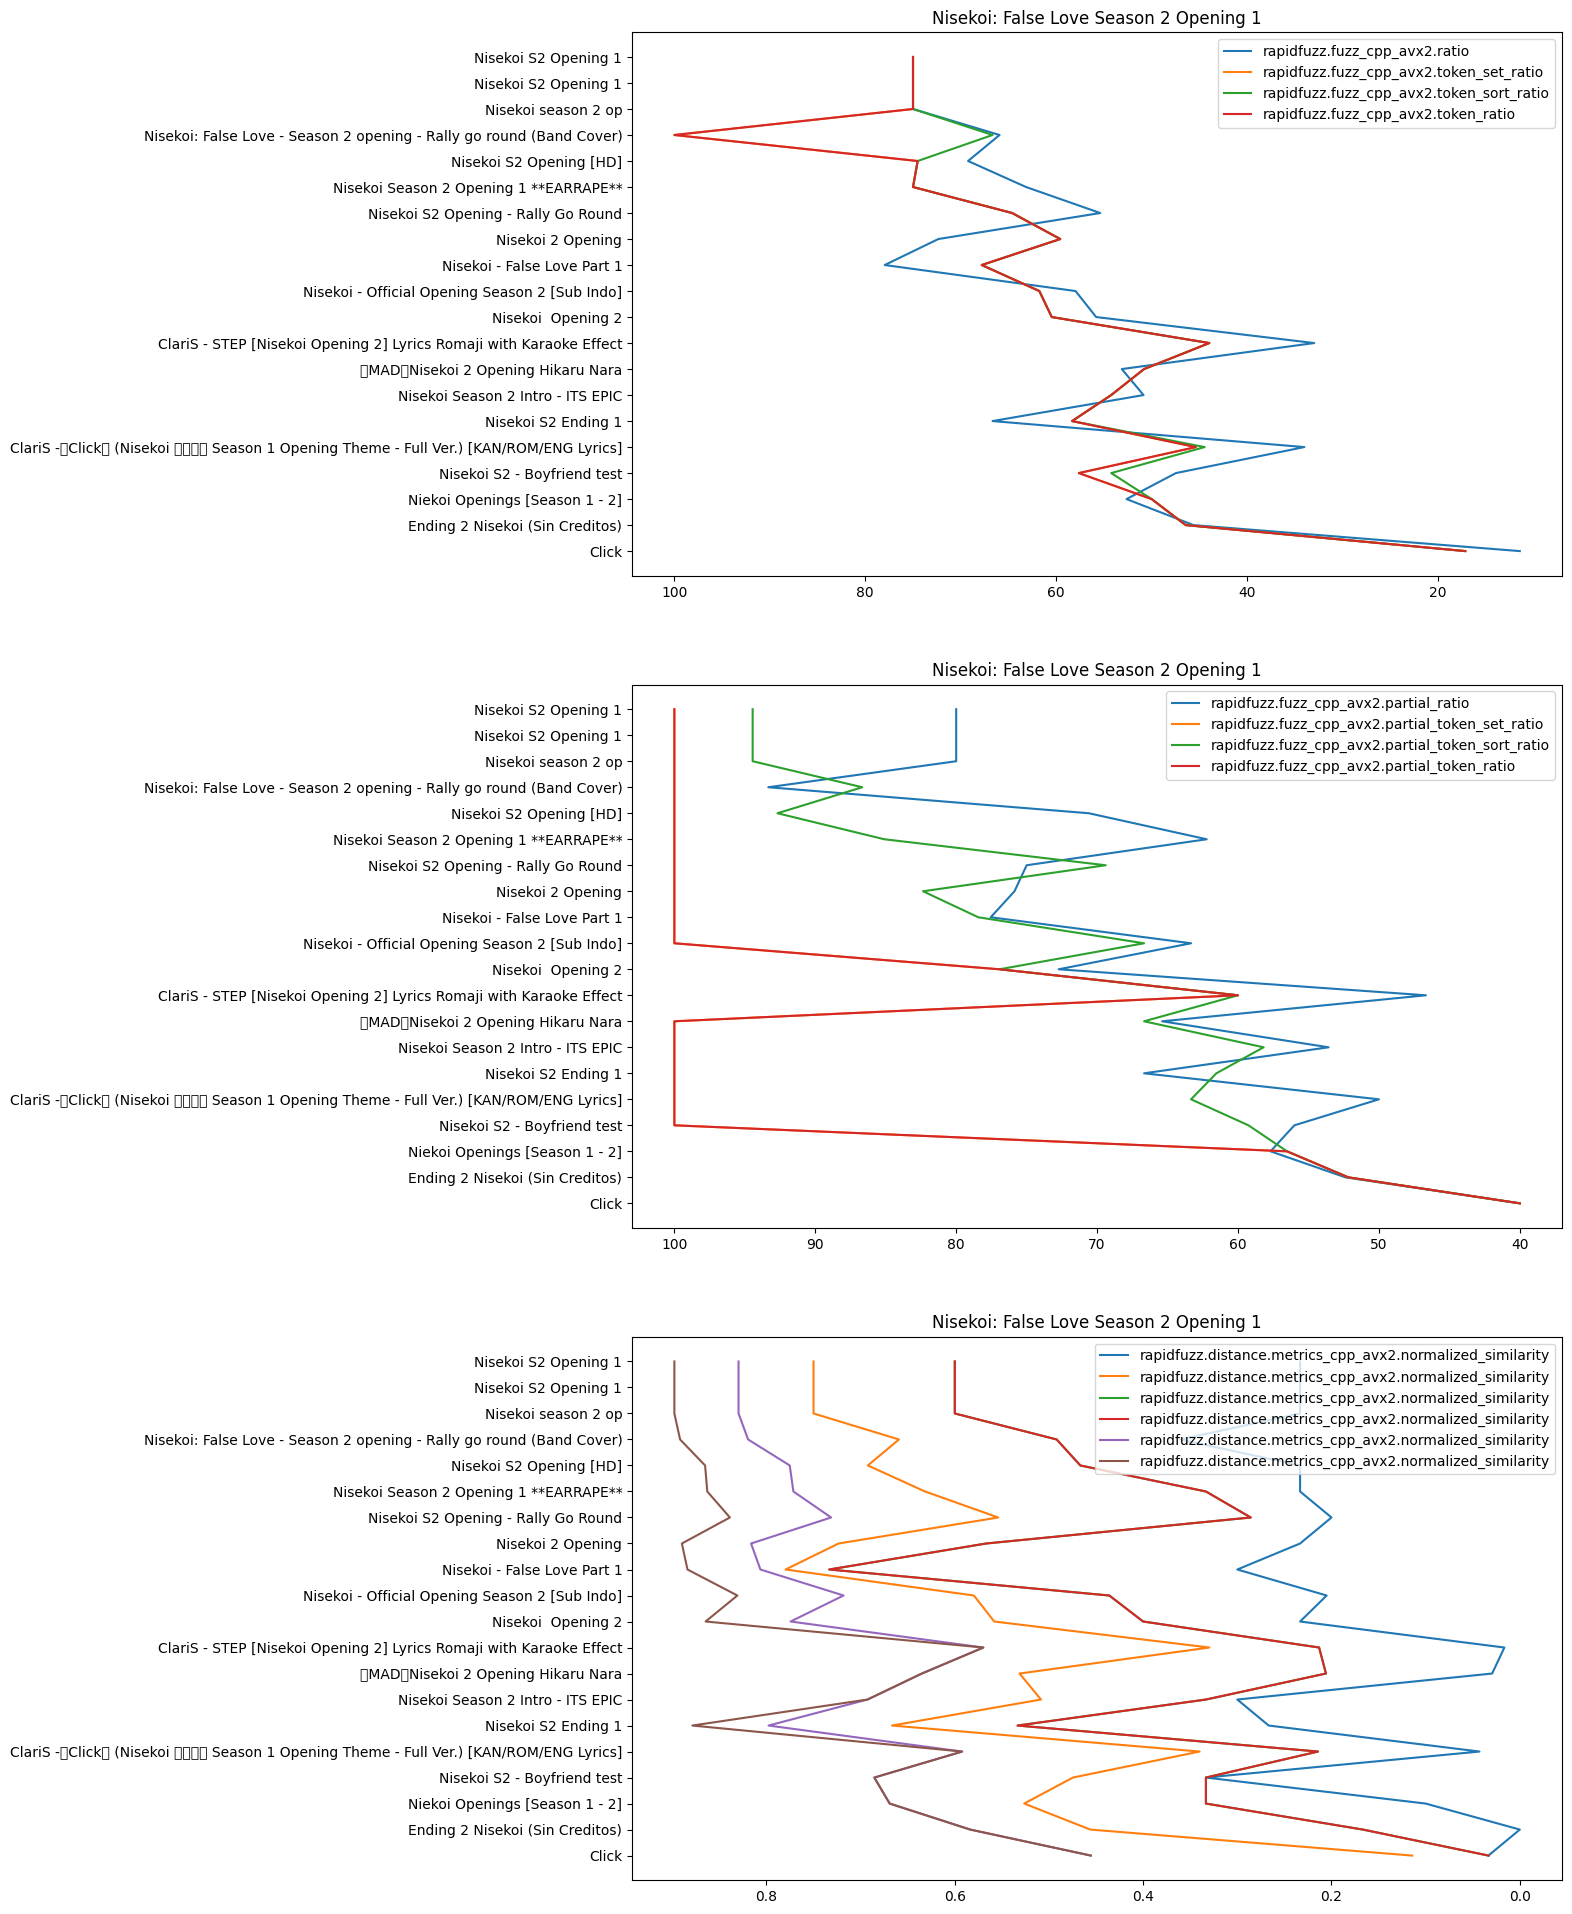

In [50]:
query = "Nisekoi: False Love Season 2 Opening 1"

titles = [
    'Nisekoi S2 Opening 1',
    'Nisekoi S2 Opening 1',
    'Nisekoi season 2 op',
    'Nisekoi: False Love - Season 2 opening - Rally go round (Band Cover)',
    'Nisekoi S2 Opening [HD]',
    'Nisekoi Season 2 Opening 1 **EARRAPE**',
    'Nisekoi S2 Opening - Rally Go Round',
    'Nisekoi 2 Opening',
    'Nisekoi - False Love Part 1',
    'Nisekoi - Official Opening Season 2 [Sub Indo]',
    'Nisekoi  Opening 2',
    'ClariS - STEP [Nisekoi Opening 2] Lyrics Romaji with Karaoke Effect',
    '【MAD】Nisekoi 2 Opening Hikaru Nara',
    'Nisekoi Season 2 Intro - ITS EPIC',
    'Nisekoi S2 Ending 1',
    'ClariS -「Click」 (Nisekoi ニセコイ Season 1 Opening Theme - Full Ver.) [KAN/ROM/ENG Lyrics]',
    'Nisekoi S2 - Boyfriend test',
    'Niekoi Openings [Season 1 - 2]',
    'Ending 2 Nisekoi (Sin Creditos)',
    'Click',
]

visualize_title_score(titles, query)

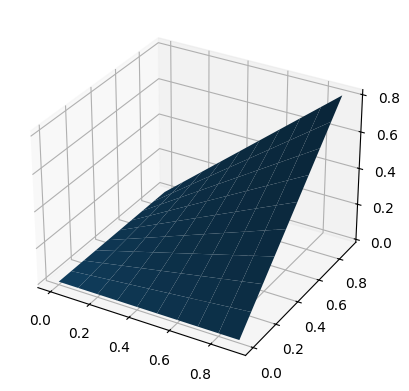

In [51]:
def f(x, y):
    return x * y

ax = plt.figure().add_subplot(projection='3d')
A = np.arange(0, 1, 0.1)
Z = np.array([[f(x, y) for y in A] for x in A])
X = np.array([[x for y in A] for x in A])
Y = np.array([[y for y in A] for x in A])
ax.plot_surface(X, Y, Z)

In [ ]:
# %cd ../../..

d:\


c:\Users\mozha\AppData\Local\pypoetry\Cache\virtualenvs\aoq-automation-QhncwGBw-py3.13\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [53]:
%pwd

'd:\\'

In [54]:
from aoq_automation.config import config

In [55]:
config.read("files/config.hidden")

[]

In [56]:
from aoq_automation.database.database import db
db.connect()

In [57]:
sources = await YoutubeSearchStrategy().get_sorted_sources(qitem_id=9)
sources

[(<aoq_automation.database.models.QItemSource at 0x2382ab4fc20>,
  1.2177653630940075),
 (<aoq_automation.database.models.QItemSource at 0x2382ab4fee0>, 1.0),
 (<aoq_automation.database.models.QItemSource at 0x2382c279ef0>, 1.0),
 (<aoq_automation.database.models.QItemSource at 0x2382c27a990>,
  0.9886608533676342),
 (<aoq_automation.database.models.QItemSource at 0x2382c299d00>,
  0.983999370240403),
 (<aoq_automation.database.models.QItemSource at 0x2382ad251d0>,
  0.9429126732851979),
 (<aoq_automation.database.models.QItemSource at 0x2382ad4a9d0>,
  0.5104710397408313),
 (<aoq_automation.database.models.QItemSource at 0x2382c1f2580>,
  0.00041334900541232844),
 (<aoq_automation.database.models.QItemSource at 0x2382c1f2eb0>,
  4.3164704051588373e-05),
 (<aoq_automation.database.models.QItemSource at 0x2382c1f03d0>,
  1.8123277558597552e-06),
 (<aoq_automation.database.models.QItemSource at 0x2382c1f1a20>,
  3.6700762429348523e-07),
 (<aoq_automation.database.models.QItemSource at 0x

In [62]:
for source in sources:
    print(f"{source[1]:.3f} - {source[0].path}")

1.218 - https://www.youtube.com/watch?v=8cUT-yHNp5c
1.000 - https://www.youtube.com/watch?v=ULjbIMvP6A0
1.000 - https://www.youtube.com/watch?v=ACtYYBnIY54
0.989 - https://www.youtube.com/watch?v=fZeQe_vEVCc
0.984 - https://www.youtube.com/watch?v=ijCRlmxUleI
0.943 - https://www.youtube.com/watch?v=sfHvgPJPMXk
0.510 - https://www.youtube.com/watch?v=0IHoWBi0cyM
0.000 - https://www.youtube.com/watch?v=tijjt3rf3gg
0.000 - https://www.youtube.com/watch?v=ngJXw214QQw
0.000 - https://www.youtube.com/watch?v=D94yoe5MmKI
0.000 - https://www.youtube.com/watch?v=MnRx6X4pk30
0.000 - https://www.youtube.com/watch?v=utpCNBqvW5g
0.000 - https://www.youtube.com/watch?v=Ayi2CJU2xmQ
0.000 - https://www.youtube.com/watch?v=sNhXgwVsW60
0.000 - https://www.youtube.com/watch?v=C_vhzMV99ug
0.000 - https://www.youtube.com/watch?v=drpYTtA60Ng
0.000 - https://www.youtube.com/watch?v=tsSpW1N0T5s
0.000 - https://www.youtube.com/watch?v=Z_va6MV-G9s
